<a href="https://colab.research.google.com/github/Aicoaching2025/House-Price-Prediction/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Size_sqft  Bedrooms  Age  Distance_miles  Location_rating          Price
0  2248.357077         3    9       12.721611                3  338095.136507
1  1930.867849         5    1       19.642537                8  341320.504805
2  2323.844269         3    2       13.004457               10  429512.254782
3  2761.514928         4   22        5.936268                6  462494.965878
4  1882.923313         5   22       13.046108                3  297401.467418


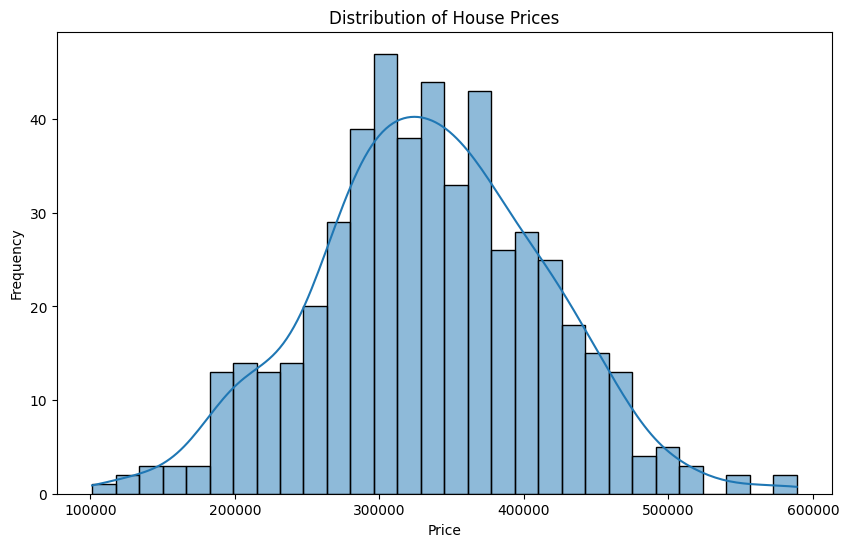

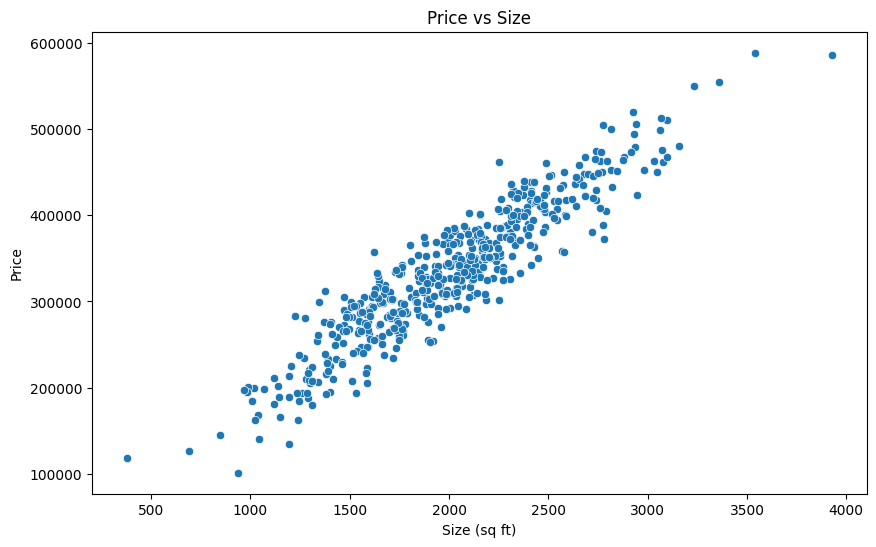

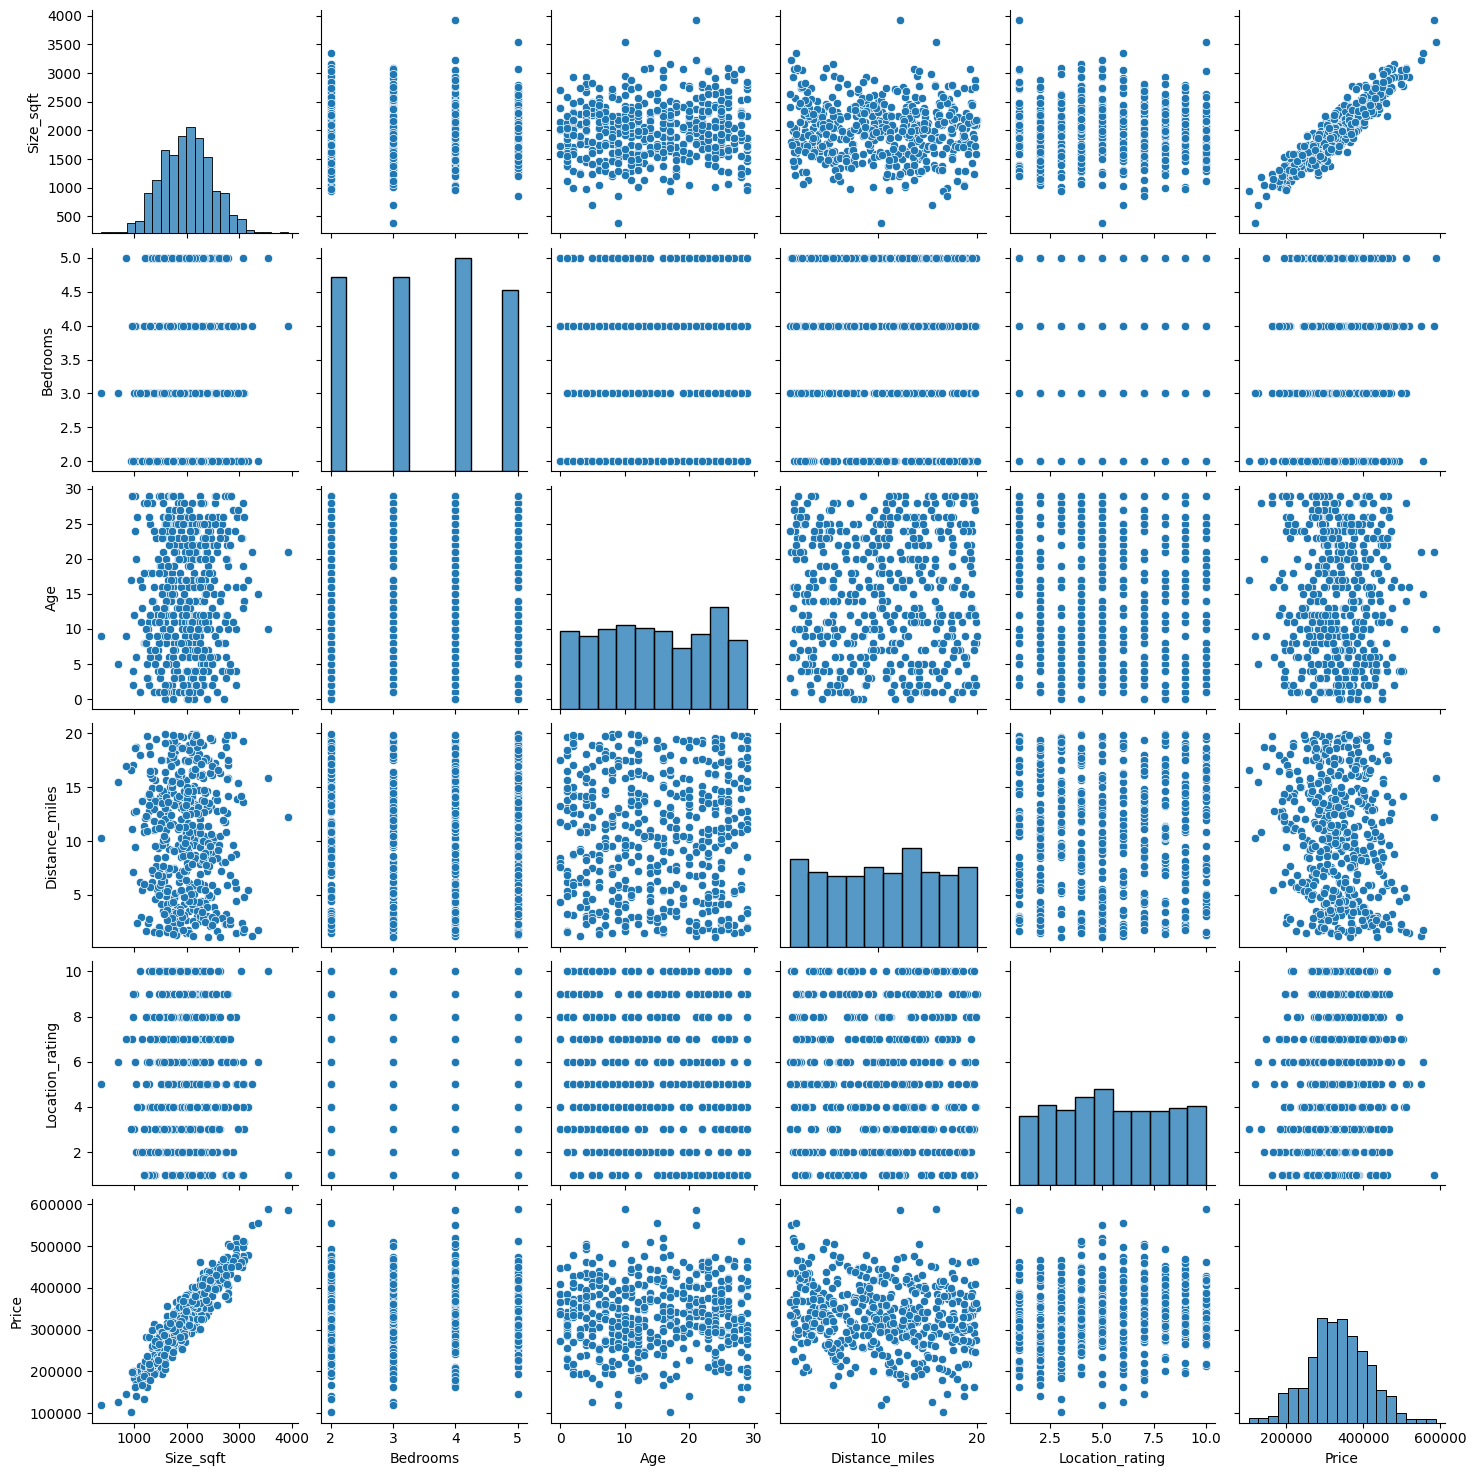

Mean Squared Error: 419380729.92
R² Score: 0.93


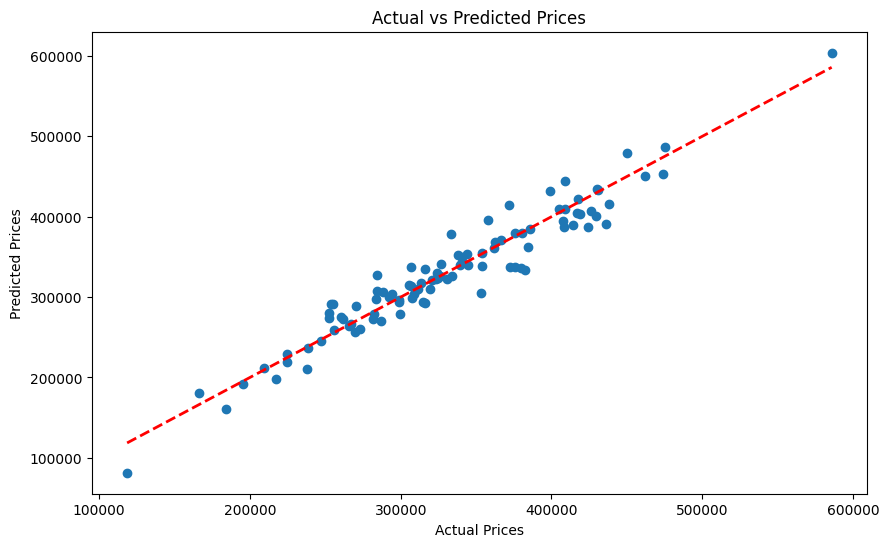

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Generate Random Data
np.random.seed(42)
num_samples = 500

# Generate random features
size = np.random.normal(loc=2000, scale=500, size=num_samples)  # size in sq ft
bedrooms = np.random.randint(2, 6, size=num_samples)  # number of bedrooms
age = np.random.randint(0, 30, size=num_samples)  # house age in years
distance = np.random.uniform(1, 20, size=num_samples)  # miles from city center
location_rating = np.random.randint(1, 11, size=num_samples)  # rating 1-10

# Price calculation with some randomness
price = (size * 150) + (bedrooms * 10000) - (age * 500) - (distance * 2000) + (location_rating * 5000)
price += np.random.normal(loc=0, scale=20000, size=num_samples)  # add noise

# Create DataFrame
df = pd.DataFrame({
    'Size_sqft': size,
    'Bedrooms': bedrooms,
    'Age': age,
    'Distance_miles': distance,
    'Location_rating': location_rating,
    'Price': price
})

# Display first 5 rows
print(df.head())

# 2. Exploratory Data Analysis (EDA) & Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size_sqft', y='Price', data=df)
plt.title('Price vs Size')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price')
plt.show()

sns.pairplot(df[['Size_sqft', 'Bedrooms', 'Age', 'Distance_miles', 'Location_rating', 'Price']])
plt.show()

# 3. Build Linear Regression Model
X = df[['Size_sqft', 'Bedrooms', 'Age', 'Distance_miles', 'Location_rating']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# 4. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 5. Visualization of Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
